# Concrete Strength Prediction

## Objective

To predict the concrete strength using the data available in file concrete_data.xls. Apply
feature engineering and model tuning to obtain 80% to 95% of R2score.

## Dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

## Github

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-otseobande

## Import Libraries

In [2]:
import pandas as pd
import warnings
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs

## Load Dataset

In [3]:
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


## Univariate analysis

### Feature description

- Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age(age) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

### Column Datatypes and data frame shape

In [4]:
concrete_df.shape

(1030, 9)

The dataset has 1,030 rows and 9 columns (features)

In [5]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

The dataset features are all continous variables (quantitive) and it has no categorical variable (qualitative)

In [6]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
concrete_df.isnull().values.any()

False

No null value in the dataset

### Univariate Analysis

#### Cement

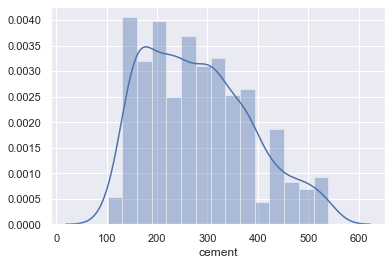

In [8]:
sns.distplot(concrete_df['cement']);

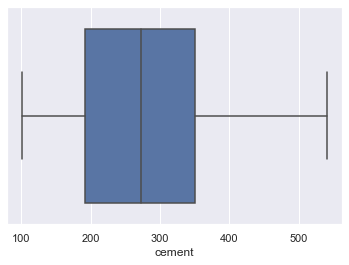

In [9]:
sns.boxplot(concrete_df['cement']);

The distribution of the cement almost looks normal with no noticable outliner.

#### Blast Furnace Slag (slag)

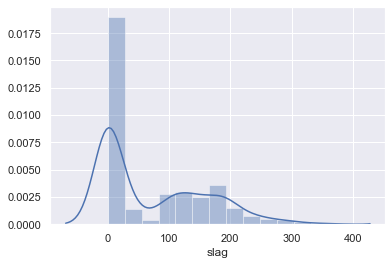

In [10]:
sns.distplot(concrete_df['slag']);

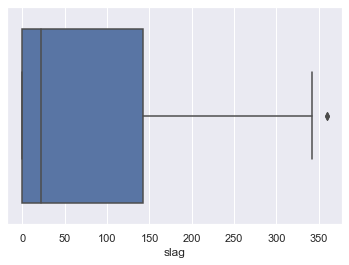

In [11]:
sns.boxplot(concrete_df['slag']);

The slag has a left skewed distribution and from the box plot we can see that there are some outliners in this feature. We can also see a lot of rows with "0" as their slag value. This might require further investigation.

#### Fly Ash (ash)

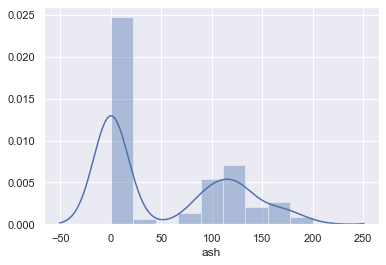

In [12]:
sns.distplot(concrete_df['ash']);

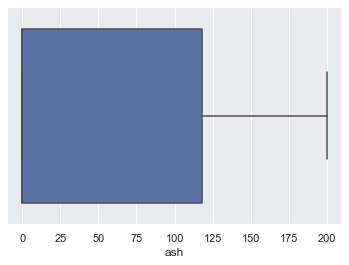

In [13]:
sns.boxplot(concrete_df['ash']);

In [14]:
rows_with_0_ash = len(concrete_df[concrete_df['ash'] == 0]) / len(concrete_df)

print('{:.2f}% of rows in this dataset has 0 ash'.format(rows_with_0_ash * 100))

54.95% of rows in this dataset has 0 ash


The data distribution in this column look heavily left skewed and has bimodal tendencies due to the high number of 0 values recorded.

#### Water

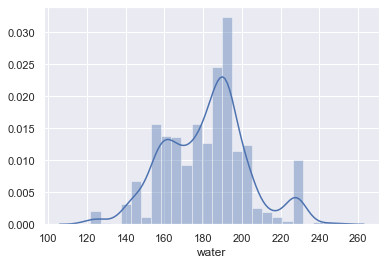

In [15]:
sns.distplot(concrete_df['water']);

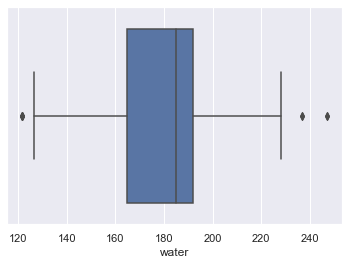

In [16]:
sns.boxplot(concrete_df['water']);

The distribution of kgs of water in concrete mixtures recorded in this dataset look almost like a normal distribution but is slightly right skewed with some outliers on both the left and right side of the distribution.

#### Superplasticizer (superplastic)

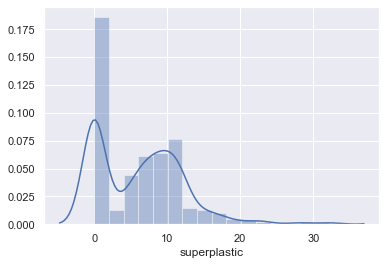

In [17]:
sns.distplot(concrete_df['superplastic']);

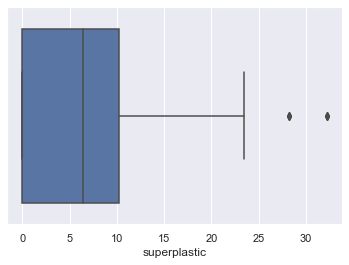

In [18]:
sns.boxplot(concrete_df['superplastic']);

In [19]:
rows_with_0_superplastic = len(concrete_df[concrete_df['superplastic'] == 0]) / len(concrete_df)

print('{:.2f}% of rows in this dataset has 0 superplastic'.format(rows_with_0_superplastic * 100))

36.80% of rows in this dataset has 0 superplastic


The data distribution looks left skewed with a lot of 0 values and a few outliers on the right.

#### Coarse Aggregate (coarseagg)

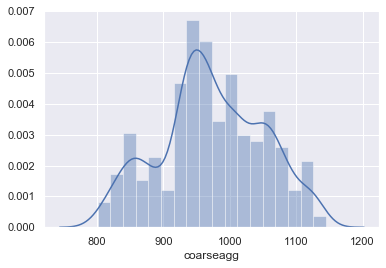

In [20]:
sns.distplot(concrete_df['coarseagg']);

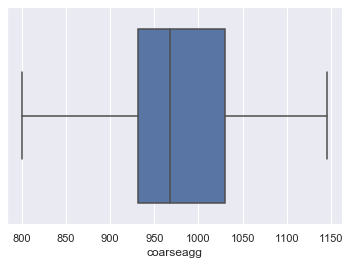

In [21]:
sns.boxplot(concrete_df['coarseagg']);

This distribution looks almost normal with no noticable outliers.

#### Fine Aggregate (fineagg)

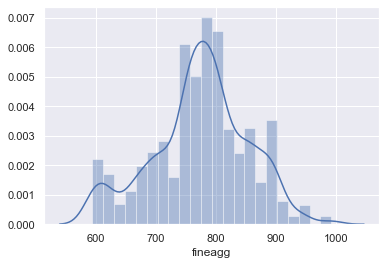

In [22]:
sns.distplot(concrete_df['fineagg']);

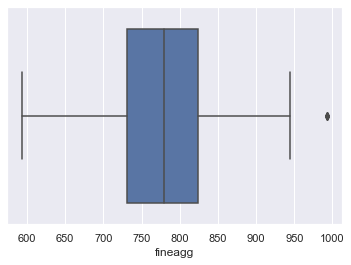

In [23]:
sns.boxplot(concrete_df['fineagg']);

This distribution looks almost normal with an outlier point on the right of the box plot.

#### Age(age) 

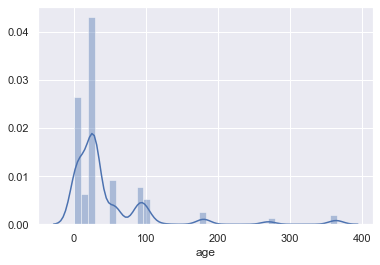

In [24]:
sns.distplot(concrete_df['age']);

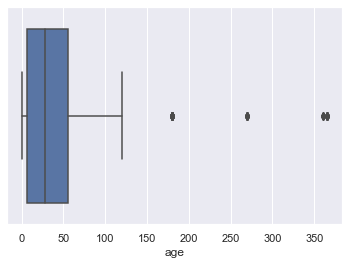

In [25]:
sns.boxplot(concrete_df['age']);

The distribution of the concrete age is left skewed with outliers to the right.

#### Concrete compressive strength(strength)

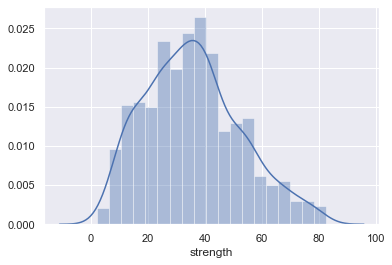

In [26]:
sns.distplot(concrete_df['strength']);

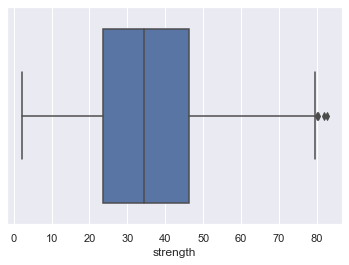

In [27]:
sns.boxplot(concrete_df['strength']);

The distribution of the concrete strength looks even and normal.

### Bivariate Analysis

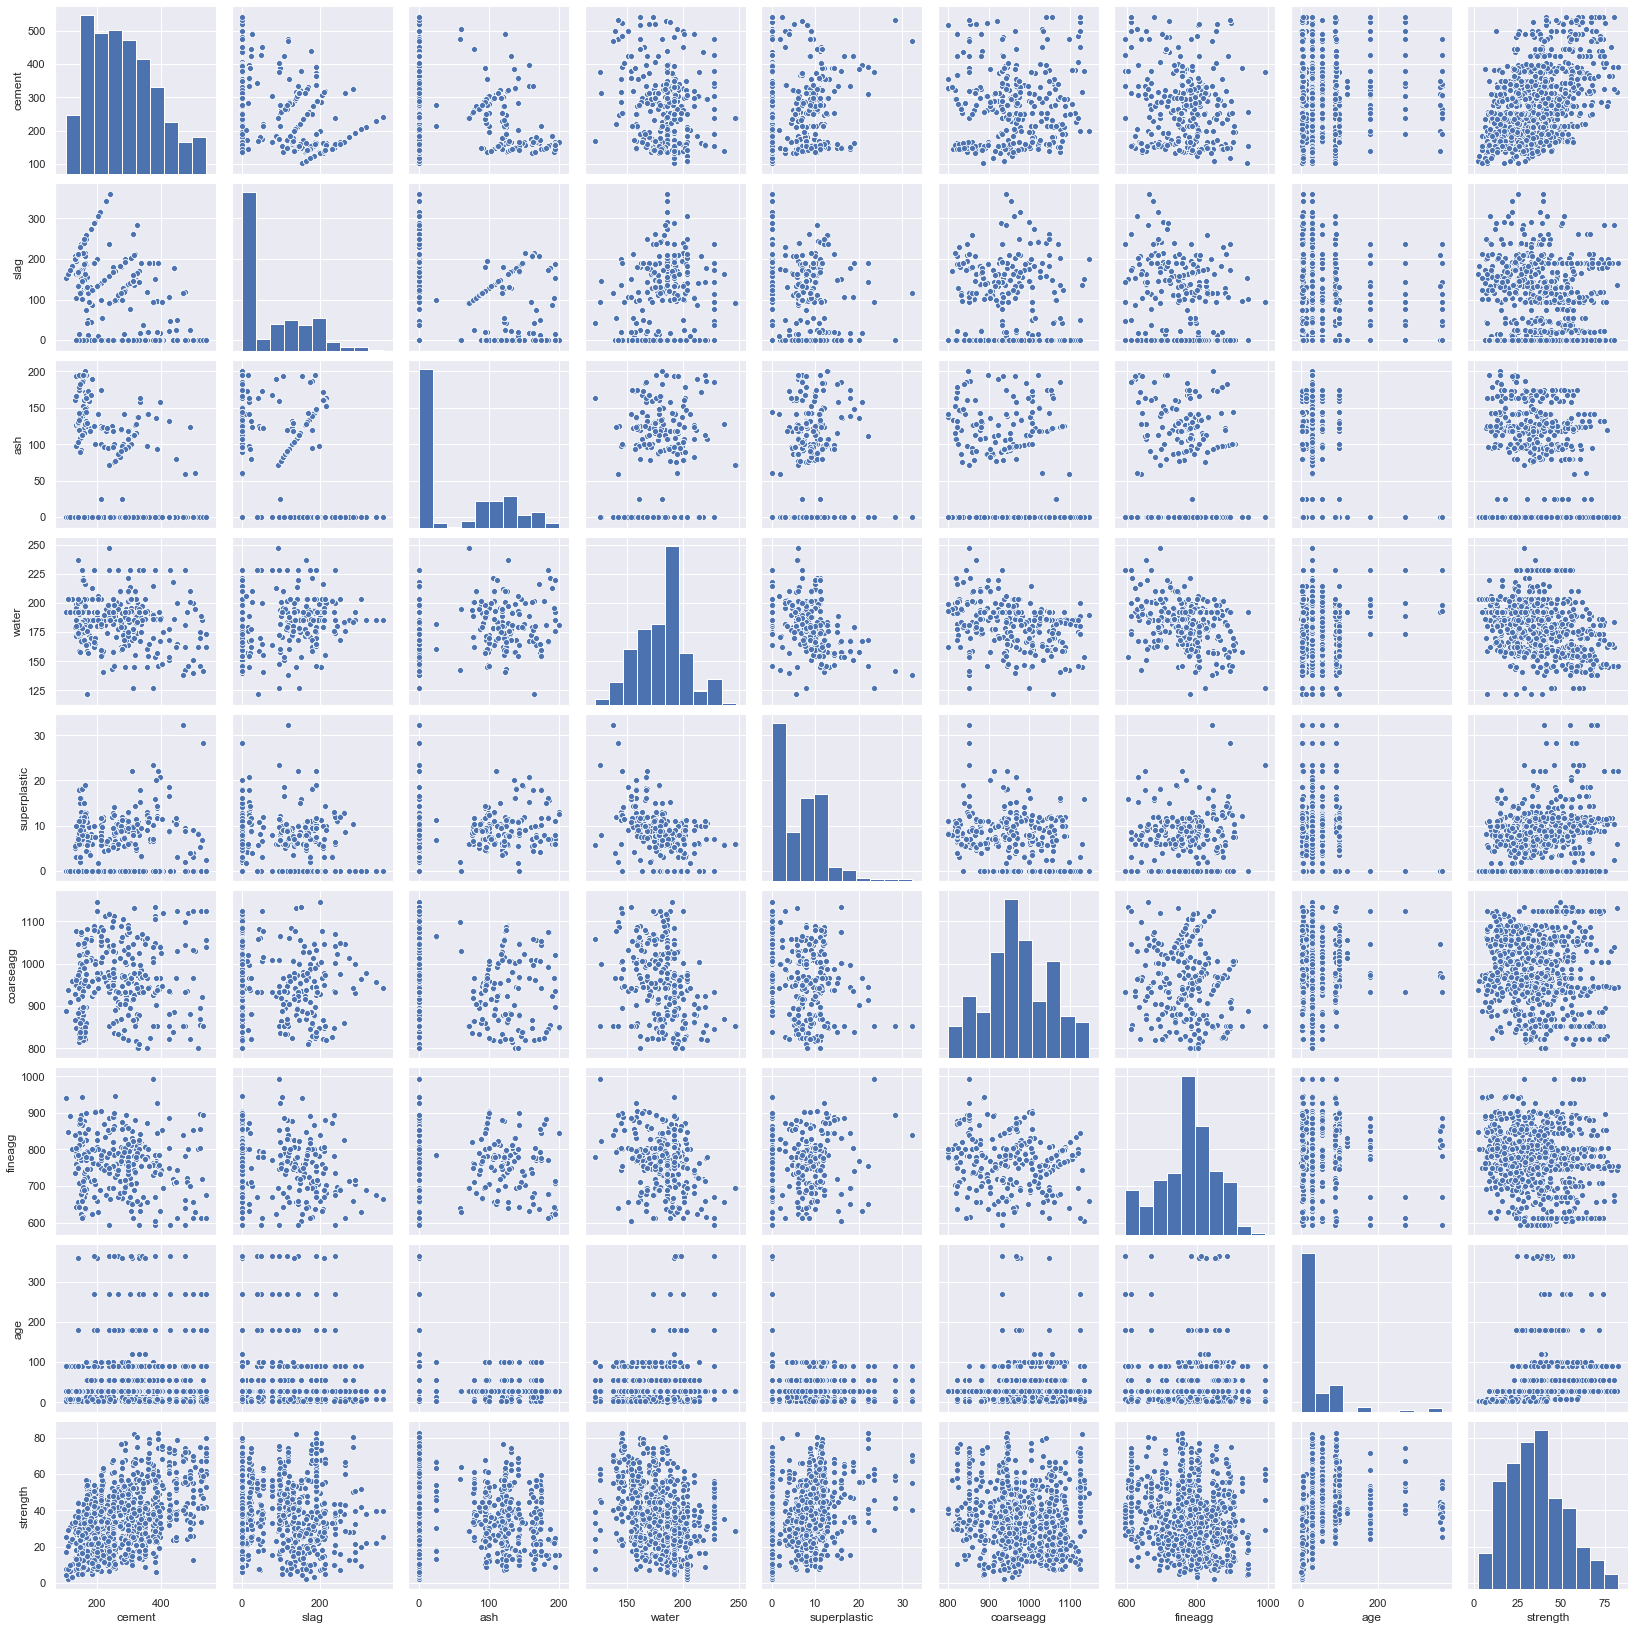

In [7]:
sns.pairplot(concrete_df)

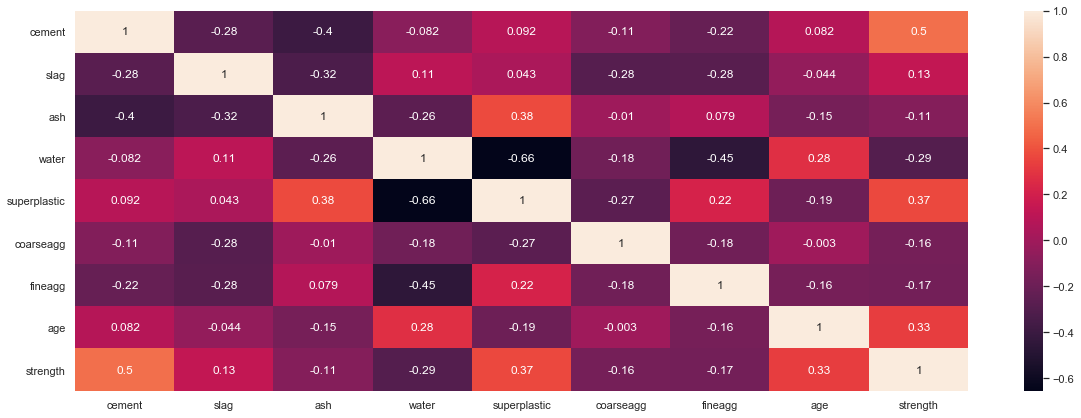

In [3]:
plt.figure(figsize=(20,7))
sns.heatmap(concrete_df.corr(), annot=True);

Observations
- There's an almost significant negative correlation between "water" and "superplastic"
- No strong linear relationship can be observed from the variables
- Cement has the highest correlation with our target variable strength at 0.5

### Feature Engineering

The independent variables show no significant correlation with each other so I'll assume is safe to user all the columns without dropping any.

In [43]:
def replace_outliers_with_mean(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    return np.where(
        (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR)), 
        series.mean(),
        series
    )
    

Replace outliers with mean

In [47]:
for column in concrete_df.columns:
    if column != 'strength':
        concrete_df[column] = replace_outliers_with_mean(concrete_df[column])

#### Train, validation, test split

In [53]:
from sklearn.model_selection import train_test_split

y = concrete_df["strength"]
x = concrete_df.iloc[:, :-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [59]:
x_train.shape

(618, 8)

In [60]:
x_test.shape

(206, 8)

In [61]:
x_val.shape

(206, 8)

### Algorithms to be considered for prediction

I would be trying out:
- Linear Regression
- Decision Tree
- Bagging

In [173]:
from sklearn.model_selection import KFold, cross_val_score
avg_scores = []
models = []

kfold = KFold(n_splits=10, random_state=1)

def save_cv_metrics(model):
    results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')

    avg_scores.append(results.mean())
    models.append(type(model).__name__)

#### Linear Regression

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Fit the model on train
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

save_cv_metrics(lin_reg_model)

#### Decision Tree

In [175]:
from sklearn.tree import DecisionTreeRegressor

d_tree_model = DecisionTreeRegressor()
d_tree_model.fit(x_train, y_train)

save_cv_metrics(d_tree_model)

#### Bagging

In [176]:
from sklearn.ensemble import BaggingRegressor

bgcl_model = BaggingRegressor(n_estimators=50,random_state=1)
bgcl_model.fit(x_train, y_train)

save_cv_metrics(bgcl_model)

#### Random Forest

In [177]:
from sklearn.ensemble import RandomForestRegressor

rfcl_model = RandomForestRegressor(n_estimators = 50, random_state=1,)
rfcl_model.fit(x_train, y_train)

save_cv_metrics(rfcl_model)

#### Adaboost

In [178]:
from sklearn.ensemble import AdaBoostRegressor

abcl_model = AdaBoostRegressor(n_estimators=10, random_state=1)
abcl_model.fit(x_train, y_train)

save_cv_metrics(abcl_model)

In [179]:
models_df = pd.DataFrame({ 'Model': models, 'Avg Score': avg_scores})

models_df

,Model,Avg Score
0,LinearRegression,0.720857
1,DecisionTreeRegressor,0.801651
2,BaggingRegressor,0.889843
3,RandomForestRegressor,0.891252
4,AdaBoostRegressor,0.708527


### Optimize Hyperparameters

In [139]:
optimized_scores = []

#### Bagging

In [182]:
from sklearn.model_selection import GridSearchCV

bg_model = BaggingRegressor()

param_grid = {
    "max_samples": [0.5, 1.0, 1.5],
    "max_features": [0.5, 1.0, 1.5],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

grid = GridSearchCV(bg_model, param_grid=param_grid, cv=10, n_jobs=-1) 

grid.fit(x_train, y_train) 

print(grid.best_params_)
grid.best_score_

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0}


0.8727613467119028

#### Random Forest

In [181]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 40, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}
grid = GridSearchCV(rf_model, param_grid=param_grid, cv=3, n_jobs=-1) 

grid.fit(x_train, y_train) 

print(grid.best_params_)
grid.best_score_

0.8682916073121878

Note:
- Due to limited CPU resources I was unable to run through wider parameter grids to tune the model parameters better

In [184]:
df = pd.DataFrame({
    'Model': ['BaggingRegressor', 'RandomForestRegressor'],
    'Avg Score from CV with defaults': [0.889843, 0.891252],
    'Best Score after hyperparemeter tuning': [0.8727613467119028, 0.8682916073121878]
})

df

,Model,Avg Score from CV with defaults,Best Score after hyperparemeter tuning
0,BaggingRegressor,0.889843,0.872761
1,RandomForestRegressor,0.891252,0.868292
